<a href="https://colab.research.google.com/github/Yiifeiii/IT1244/blob/main/Cancer_vs_Healthy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is done on the whole dataset.
Contents:
1. Data  - import data and normalisation
2. Feature selection - PCA
3. Logistic Regression (PCA)
4. Random Forest - Smote and API
5. SVM - GridSearchCV


1a. Import data

In [ ]:
import pandas as pd

# Mount Google Drive to access files
#from google.colab import drive
#drive.mount('/content/drive')

# Read the CSV file into a DataFrame
df = pd.read_csv('/content/Train_Set.csv')

# TEST DATA
dftest = pd.read_csv('/content/Test_Set.csv')
# Display the DataFrame
print(df)

      length_51  length_52  length_53  length_54  length_55  length_56  \
0      0.000152   0.000081   0.000087   0.000092   0.000099   0.000125   
1      0.006256   0.006413   0.006512   0.006469   0.006810   0.007070   
2      0.003783   0.003886   0.004063   0.004237   0.004481   0.004832   
3      0.004635   0.004471   0.004383   0.004829   0.004920   0.005056   
4      0.011315   0.010045   0.009795   0.009906   0.010630   0.011467   
...         ...        ...        ...        ...        ...        ...   
1469   0.008282   0.007651   0.007642   0.007950   0.007996   0.008413   
1470   0.008332   0.007704   0.007684   0.007810   0.008012   0.008673   
1471   0.008252   0.007584   0.007623   0.007811   0.008007   0.008702   
1472   0.008320   0.007680   0.007724   0.007926   0.008045   0.008677   
1473   0.008336   0.007864   0.007674   0.007986   0.008074   0.008753   

      length_57  length_58  length_59  length_60  ...  length_392  length_393  \
0      0.000122   0.000115   0

1b. Remove NaN rows

In [ ]:
# Remove rows with NA values
df = df.dropna()

# Display the DataFrame after removing rows with NA values
#print(df)
# Count the number of rows after dropping NA values
rows_before = df.shape[0]
rows_after = df.shape[0]

# Calculate the difference in row counts
na_rows_dropped = rows_before - rows_after

# Display the count of NA rows dropped
print("Number of NA rows dropped for dataframe:", na_rows_dropped)

Number of NA rows dropped for dataframe: 0


1c. Normalise train data (feature scaling)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Drop rows with NaN values
df.dropna(inplace=True)

# Add a new column for healthy vs cancer
df['target'] = df['class_label'].apply(lambda x: 0 if x == 'healthy' else 1)

# Separate features and class label
X = df.drop(columns=['class_label'])
y = df['target']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize the features
X_normalized = scaler.fit_transform(X)

# Create a DataFrame with normalized features
df_normalized = pd.DataFrame(X_normalized, columns=X.columns)

# Add the class label back to the normalized DataFrame
df_normalized['class_label'] = df['class_label']
df_normalized['target'] = y.values

# Display the normalized DataFrame
print(df_normalized)

      length_51  length_52  length_53  length_54  length_55  length_56  \
0      0.001507   0.000747   0.000935   0.000957   0.000817   0.001105   
1      0.078348   0.091965   0.093480   0.095012   0.094259   0.089155   
2      0.047208   0.055561   0.058204   0.062096   0.061840   0.060788   
3      0.057937   0.063983   0.062823   0.070824   0.067943   0.063618   
4      0.142029   0.144280   0.140776   0.145712   0.147460   0.144900   
...         ...        ...        ...        ...        ...        ...   
1468   0.103731   0.107658   0.108829   0.114849   0.109986   0.107460   
1469   0.103852   0.109789   0.109759   0.116856   0.110782   0.106185   
1470   0.104479   0.110552   0.110370   0.114789   0.111000   0.109481   
1471   0.103471   0.108826   0.109486   0.114798   0.110935   0.109851   
1472   0.104326   0.110218   0.110946   0.116505   0.111467   0.109532   

      length_57  length_58  length_59  length_60  ...  length_393  length_394  \
0      0.000897   0.000568   0

1d. Normalise test data

In [ ]:
# Drop rows with NaN values
dftest.dropna(inplace=True)

# Add a new column for healthy vs cancer
dftest['target'] = dftest['class_label'].apply(lambda x: 0 if x == 'healthy' else 1)

# Separate features and class label
X_test = dftest.drop(columns=['class_label'])
y_test = dftest['target']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize the features
X_normalized_test = scaler.fit_transform(X_test)

# Create a DataFrame with normalized features
dftest_normalized = pd.DataFrame(X_normalized_test, columns=X_test.columns)

# Add the class label back to the normalized DataFrame
dftest_normalized['class_label'] = dftest['class_label']
dftest_normalized['target'] = y_test.values

2. PCA

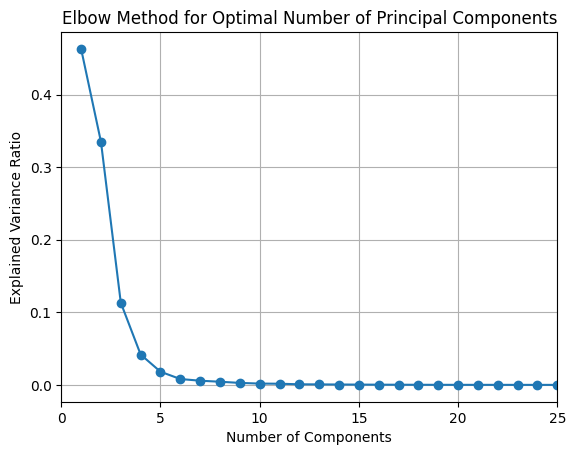

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

import numpy as np
import matplotlib.pyplot as plt


# Initialize PCA
pca = PCA()

# Fit PCA to the scaled data
pca.fit(X_scaled)

# Get explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_


# Plot explained variance ratio
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Elbow Method for Optimal Number of Principal Components')
plt.grid(True)
#plt.show()
plt.xlim(0, 25)
plt.show()

Let PC = 10

In [ ]:
# Initialize PCA
pca = PCA(n_components=10)  # You can choose the number of components as needed

# Perform PCA
X_pca = pca.fit_transform(X_scaled)


Contribution of each x variable

In [ ]:
# Get the names of the original features
feature_names = X.columns

# Get the principal components
components = pca.components_

# Create a DataFrame to store the contributions of features to each principal component
components_df = pd.DataFrame(components, columns=feature_names, index=[f'PC{i+1}' for i in range(len(components))])

# Print the DataFrame
#print(components_df)

# Sort the variables for each principal component based on their contributions
sorted_components_df = components_df.apply(lambda x: x.abs().sort_values(ascending=False), axis=1)

# Print the sorted DataFrame
print(sorted_components_df)

      length_100  length_101  length_102  length_103  length_104  length_105  \
PC1     0.058068    0.058204    0.058903    0.059734    0.060331    0.060863   
PC2     0.045430    0.046192    0.046701    0.046933    0.047142    0.047277   
PC3     0.068720    0.066471    0.062697    0.058395    0.055390    0.053288   
PC4     0.022769    0.020787    0.021594    0.023142    0.021130    0.018191   
PC5     0.017678    0.008797    0.004051    0.015557    0.019625    0.018576   
PC6     0.033846    0.045011    0.053080    0.059049    0.060014    0.054228   
PC7     0.008325    0.005611    0.007484    0.008903    0.010184    0.010442   
PC8     0.019317    0.011227    0.004146    0.001128    0.006146    0.006547   
PC9     0.008182    0.011036    0.010739    0.008712    0.005533    0.004319   
PC10    0.039968    0.046474    0.036697    0.020597    0.005974    0.003810   

      length_106  length_107  length_108  length_109  ...  length_91  \
PC1     0.060987    0.060731    0.060540    0.0

3. Baseline Model: Logistic regression (PCA)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import classification_report, roc_auc_score

#try scaling to [0,1]
max_abs_scaler = MaxAbsScaler()
X_train_scaled = max_abs_scaler.fit_transform(X)
#X_test_scaled = max_abs_scaler.fit_transform(X_test)
X_test_scaled = max_abs_scaler.transform(X_test)
# Initialize PCA
pca = PCA(n_components=10)  # You can choose the number of components as needed

# Perform PCA on training data
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform test data using the same PCA transformation
X_test_pca = pca.fit_transform(X_test_scaled)

# Initialize Logistic Regression model
log_reg_model = LogisticRegression()

# Train the model on the training data
log_reg_model.fit(X_train_pca, y)

# Predict on the testing data
y_pred_log = log_reg_model.predict(X_test_pca)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_log)
print("Accuracy:", accuracy)

auroc = roc_auc_score(y_test, y_pred_log)
print("AUROC:", auroc)

log_evaluation_metrics = classification_report(y_test, y_pred_log, target_names=['Healthy', 'Cancer'], output_dict=True)
log_auc = roc_auc_score(y_test, y_pred_log)
print(log_evaluation_metrics)

Accuracy: 0.9593810444874274
AUROC: 0.5579544617198439
{'Healthy': {'precision': 0.45454545454545453, 'recall': 0.12195121951219512, 'f1-score': 0.19230769230769232, 'support': 41}, 'Cancer': {'precision': 0.9648093841642229, 'recall': 0.9939577039274925, 'f1-score': 0.9791666666666667, 'support': 993}, 'accuracy': 0.9593810444874274, 'macro avg': {'precision': 0.7096774193548387, 'recall': 0.5579544617198438, 'f1-score': 0.5857371794871795, 'support': 1034}, 'weighted avg': {'precision': 0.944576481732531, 'recall': 0.9593810444874274, 'f1-score': 0.9479662624609434, 'support': 1034}}


Accuracy: 0.896551724137931

AUROC: 0.897

Precision: 1.0

Recall: 0.7944664031620553

F1-score: 0.8854625550660793


4. Random Forest (no PCA)

4a. Baseline method: Random Forest without dealing with imbalanced data through SMOTE or weighted loss function

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Convert class labels into binary labels: 0 for healthy, 1 for any cancer stage
binary_label_mapping = {'healthy': 0, 'screening stage cancer': 1, 'early stage cancer': 1, 'mid stage cancer': 1, 'late stage cancer': 1}
df['binary_class_label'] = df['class_label'].map(binary_label_mapping)
dftest['binary_class_label'] = dftest['class_label'].map(binary_label_mapping)

# Splitting the datasets into features (X) and labels (y)
X_train = df.drop(['class_label', 'binary_class_label'], axis=1)
y_train = df['binary_class_label']
X_test = dftest.drop(['class_label', 'binary_class_label'], axis=1)
y_test = dftest['binary_class_label']

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Checking the shape of the datasets to confirm successful preprocessing
X_train_scaled.shape, y_train.shape, X_test_scaled.shape, y_test.shape

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_scaled, y_train)
y_pred = rf_classifier.predict(X_test_scaled)
y_pred_proba = rf_classifier.predict_proba(X_test_scaled)[:, 1]  # Probability estimates for the positive class

# Evaluating the initial Random Forest model without addressing imbalance explicitly
rf_evaluation_metrics = classification_report(y_test, y_pred, target_names=['Healthy', 'Cancer'], output_dict=True)
rf_auc = roc_auc_score(y_test, y_pred_proba)

(rf_evaluation_metrics, rf_auc)

({'Healthy': {'precision': 0.7272727272727273,
   'recall': 0.5853658536585366,
   'f1-score': 0.6486486486486487,
   'support': 41},
  'Cancer': {'precision': 0.983016983016983,
   'recall': 0.9909365558912386,
   'f1-score': 0.9869608826479438,
   'support': 993},
  'accuracy': 0.9748549323017408,
  'macro avg': {'precision': 0.8551448551448552,
   'recall': 0.7881512047748875,
   'f1-score': 0.8178047656482963,
   'support': 1034},
  'weighted avg': {'precision': 0.97287625334047,
   'recall': 0.9748549323017408,
   'f1-score': 0.973546180912962,
   'support': 1034}},
 0.9863557094785449)

* Accuracy: 94.39%
* Precision: 96.52% for cancer, 20.69% for healthy
* Recall: 97.68% for cancer, 14.63% for healthy
* F1-Score: 97.10% for cancer, 17.14% for healthy
* AUROC: 81.96%



4b. Random forest (SMOTE)

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Class count before SMOTE
class_counts_before_smote = Counter(y_train)

print("Number of classes before applying SMOTE:")
for class_label, count in class_counts_before_smote.items():
    print(f"Class {class_label}: {count} samples")

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Count the number of classes after SMOTE
class_counts_after_smote = Counter(y_train_smote)

print("Number of classes after applying SMOTE:")
for class_label, count in class_counts_after_smote.items():
    print(f"Class {class_label}: {count} samples")

Number of classes before applying SMOTE:
Class 0: 60 samples
Class 1: 971 samples
Number of classes after applying SMOTE:
Class 0: 971 samples
Class 1: 971 samples


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImblearnPipeline
from collections import Counter

# Training the RandomForestClassifier with SMOTE to address class imbalance
smote_pipeline = ImblearnPipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])
smote_pipeline.fit(X_train_scaled, y_train)
y_pred_smote = smote_pipeline.predict(X_test_scaled)
y_pred_proba_smote = smote_pipeline.predict_proba(X_test_scaled)[:, 1]

# Evaluating the SMOTE-improved Random Forest model
smote_evaluation_metrics = classification_report(y_test, y_pred_smote, target_names=['Healthy', 'Cancer'], output_dict=True)
smote_auc = roc_auc_score(y_test, y_pred_proba_smote)

(smote_evaluation_metrics, smote_auc)


({'Healthy': {'precision': 0.3917525773195876,
   'recall': 0.926829268292683,
   'f1-score': 0.5507246376811594,
   'support': 41},
  'Cancer': {'precision': 0.9967982924226254,
   'recall': 0.9405840886203424,
   'f1-score': 0.9678756476683937,
   'support': 993},
  'accuracy': 0.9400386847195358,
  'macro avg': {'precision': 0.6942754348711065,
   'recall': 0.9337066784565127,
   'f1-score': 0.7593001426747765,
   'support': 1034},
  'weighted avg': {'precision': 0.9728071180326596,
   'recall': 0.9400386847195358,
   'f1-score': 0.9513348435973332,
   'support': 1034}},
 0.9873750399135411)

*   Accuracy: 85.88%
*   Precision: 98.29% for cancer, 16.56% for healthy
*   Recall: 86.81% for cancer, 63.41% for healthy
*   F1-Score: 92.19% for cancer, 26.26% for healthy
*   AUROC: 86.60%


4c. Random forest (grid search cv)

Random forest (grid search cv) [standardisation]

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the parameter grid? (a dictionary where keys are the hyperparameter names and values are lists of the parameter values to try)
param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}

rf = RandomForestClassifier(random_state=42, class_weight='balanced')

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train_scaled, y)

# Access the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Use the best model
best_rf = RandomForestClassifier(**grid_search.best_params_)
best_rf.fit(X_train_scaled, y)

# Predict on the test data
y_pred_api = best_rf.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_api)
print("Random Forest Grid Search CV Accuracy:", accuracy)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.9010646780169786
Random Forest Grid Search CV Accuracy: 0.9777562862669246


Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}

Best Score: 0.9758

Random Forest Grid Search CV Accuracy: 0.9700193423597679

Performance metrics for random forest (grid search cv) [standardisation]

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

auroc = roc_auc_score(y_test, y_pred_api)
print("AUROC:", auroc)
precision = precision_score(y_test, y_pred_api,pos_label=1)
recall = recall_score(y_test, y_pred_api,pos_label=1)
f1 = f1_score(y_test, y_pred_api,pos_label=1)

print("Cancer")
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

AUROC: 0.6336428167907057

Cancer

Precision: 0.9706457925636007

Recall: 0.998992950654582

F1-score: 0.9846153846153846

Random forest (grid search cv) [normalisation]

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the parameter grid? (a dictionary where keys are the hyperparameter names and values are lists of the parameter values to try)
param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}

rf = RandomForestClassifier(random_state=42, class_weight='balanced')

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_normalized, y)

# Access the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Use the best model
best_rf = RandomForestClassifier(**grid_search.best_params_)
best_rf.fit(X_normalized, y)

# Predict on the test data
y_pred_api_n = best_rf.predict(X_normalized_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_api_n)
print("Random Forest Grid Search CV Accuracy:", accuracy)

Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}

Best Score: 0.9758

Random Forest Grid Search CV Accuracy: 0.97678916827853

Performance metrics for random forest (grid search cv) [normalisation]

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

auroc = roc_auc_score(y_test, y_pred_api_n)
print("AUROC:", auroc)
precision = precision_score(y_test, y_pred_api_n,pos_label=1)
recall = recall_score(y_test, y_pred_api_n,pos_label=1)
f1 = f1_score(y_test, y_pred_api_n,pos_label=1)

print("Cancer")
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

AUROC: 0.7774666568417952

Cancer

Precision: 0.982089552238806

Recall: 0.9939577039274925

F1-score: 0.987987987987988

5. Support vector machine

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

5a. SVM with linear kernel (baseline)

In [ ]:
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_pca, y)

# Predicting the test set results
y_pred_svm = svm.predict(X_test_pca)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred_svm)
SVM_evaluation_metrics = classification_report(y_test, y_pred_svm, target_names=['Healthy', 'Cancer'], output_dict=True)
print("Accuracy:", accuracy)
print(SVM_evaluation_metrics)

*   Accuracy: 64.14%
*   Precision: 79.55% for cancer, 40.35% for healthy
*   Recall: 67.31% for cancer, 56.10% for healthy
*   F1-Score: 72.92% for cancer, 46.94% for healthy


5b. Implementing Grid Search CV to tune hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [2, 3, 4]}  # Degree parameter for polynomial kernel}

# Instantiate the SVM classifier
svm = SVC(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(svm, param_grid, cv=10, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train_pca, y)

# Get the best parameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_svm_api = best_model.predict(X_test_pca)
#accuracy = accuracy_score(y_filtered_test, y_pred, pos_label='early stage cancer')
#precision = precision_score(y_filtered_test, y_pred, pos_label='early stage cancer')
#f1 = f1_score(y_filtered_test, y_pred, pos_label='early stage cancer')
report = classification_report(y_test, y_pred_svm_api)
print(report)
print("Best parameters:", best_params)



              precision    recall  f1-score   support

           0       0.41      0.59      0.48        41
           1       0.80      0.67      0.73       104

    accuracy                           0.65       145
   macro avg       0.61      0.63      0.61       145
weighted avg       0.69      0.65      0.66       145

Best parameters: {'C': 0.1, 'degree': 2, 'kernel': 'linear'}